In [5]:
import os
import shutil #쉘 유틸
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
import numpy as np

In [6]:
#Original Data Path
original_dataset_dir = './datasets/train' #./는 현재 디렉토리

# 이미지 데이터를 3조각으로 나누기
# Small Dataset path
base_dir = './datasets/cats_and_dogs_small'

if os.path.exists(base_dir): #cat_and_dogs_small이 있는지 없는지 체크
    shutil.rmtree(base_dir)  #있으면 지우고
os.mkdir(base_dir) #새로만듬    
#다시 만드는 이유는 새로운 데이터가 들어올 때 갱신하기 위함

In [8]:
# Train, Vaildation, Test data
train_dir = os.path.join(base_dir,'train') #path: 경로 확인, join:두 개의 경로 합침
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [10]:
#고양이와 강아지 디렉토리 만들기
train_cats_dir = os.path.join(train_dir,'train_cats')
train_dogs_dir = os.path.join(train_dir,'train_dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir,'test_cats')
test_dogs_dir = os.path.join(test_dir,'test_dogs')

os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)
os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

In [18]:
# file copy

#학습용 데이터 카피
#쉽게 이해할 수 있는 코드
# fnames = []
# for i in range(1000):
#     filename = 'cat.{}.jpg'.format(i) #파일이름은 cat.i.jpg
#     fnames.append(filename)
# print(fnames)


#간결한 코드
# cat train data의 카피
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) #원본 경로
    dst = os.path.join(train_cats_dir, fname) #카피할 경로
    shutil.copyfile(src, dst) #원본 경로에서 dst경로로 카피해라
    
# dog train data의 카피
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) #원본 경로
    dst = os.path.join(train_dogs_dir, fname) #카피할 경로
    shutil.copyfile(src, dst) #원본 경로에서 dst경로로 카피해라
print('-------------------Train dataset copy completed')

In [19]:
# cat validation data의 카피
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) #원본 경로
    dst = os.path.join(validation_cats_dir, fname) #카피할 경로
    shutil.copyfile(src, dst) #원본 경로에서 dst경로로 카피해라
    
# dog validation data의 카피
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) #원본 경로
    dst = os.path.join(validation_dogs_dir, fname) #카피할 경로
    shutil.copyfile(src, dst) #원본 경로에서 dst경로로 카피해라
print('-------------------Validation dataset copy completed')

-------------------Validation dataset copy completed


In [20]:
# cat test data의 카피
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) #원본 경로
    dst = os.path.join(test_cats_dir, fname) #카피할 경로
    shutil.copyfile(src, dst) #원본 경로에서 dst경로로 카피해라
    
# dog test data의 카피
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) #원본 경로
    dst = os.path.join(test_dogs_dir, fname) #카피할 경로
    shutil.copyfile(src, dst) #원본 경로에서 dst경로로 카피해라
print('-------------------Test dataset copy completed')

-------------------test dataset copy completed


In [26]:
print('Train cat images : ',len(os.listdir(train_cats_dir)))# listdir() : 파일의 목록, len로 감싸서 갯수 세기
print('Train dog images : ',len(os.listdir(train_dogs_dir)))
print('Validation cat images : ',len(os.listdir(validation_cats_dir)))# listdir() : 파일의 목록, len로 감싸서 갯수 세기
print('Validation dog images : ',len(os.listdir(validation_dogs_dir)))
print('Test cat images : ',len(os.listdir(test_cats_dir)))# listdir() : 파일의 목록, len로 감싸서 갯수 세기
print('Test dog images : ',len(os.listdir(test_dogs_dir)))


Train cat images :  1001
Train dog images :  1001
Validation cat images :  500
Validation dog images :  500
Test cat images :  500
Test dog images :  500


In [29]:
#빌드 네트워크

from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3))) #컬러 이미지는 3
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [32]:
from tensorflow.keras import optimizers

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [79]:
# Data Preprocessing
# 이미지 픽셀을 가로 세로 맞춘다.
# Image scaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255) #스케일 재조정
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(  #target디렉토리 입력
train_dir,
target_size = (150,150),
batch_size=20,
class_mode='binary') #픽셀은 150,150으로 조정
test_generator = test_datagen.flow_from_directory(  #target디렉토리 입력
test_dir,
target_size = (150,150),
batch_size=20, #20개 단위
class_mode='binary') #픽셀은 150,150으로 조정

Found 2007 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [37]:
train_generator

In [38]:
for data_batch, labels_batch in train_generator:
    print('Batch Data Size: ', data_batch.shape)
    print('Batch Label Size: ', labels_batch.shape)
    break

Batch Data Size:  (20, 150, 150, 3)
Batch Label Size:  (20,)


In [40]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100, #100개씩 나눔
epochs=30,
validation_data = test_generator,
validation_steps=50)

Epoch 1/30
100/100 [==============================] - 56s 564ms/step - loss: 0.7221 - accuracy: 0.5204 - val_loss: 0.6908 - val_accuracy: 0.5040
Epoch 2/30
100/100 [==============================] - 50s 500ms/step - loss: 0.6926 - accuracy: 0.5773 - val_loss: 0.6560 - val_accuracy: 0.6180
Epoch 3/30
100/100 [==============================] - 49s 490ms/step - loss: 0.6876 - accuracy: 0.6321 - val_loss: 0.6552 - val_accuracy: 0.6210
Epoch 4/30
100/100 [==============================] - 49s 489ms/step - loss: 0.5929 - accuracy: 0.6930 - val_loss: 0.6078 - val_accuracy: 0.6930
Epoch 5/30
100/100 [==============================] - 48s 484ms/step - loss: 0.5684 - accuracy: 0.7036 - val_loss: 0.6098 - val_accuracy: 0.6840
Epoch 6/30
100/100 [==============================] - 49s 485ms/step - loss: 0.5163 - accuracy: 0.7328 - val_loss: 0.8456 - val_accuracy: 0.6430
Epoch 7/30
100/100 [==============================] - 48s 484ms/step - loss: 0.4896 - accuracy: 0.7695 - val_loss: 0.6671 - val_ac

In [53]:
model.save('cats_and_dogs_small_1.0.h5') #모델이 잘 나오면 저장 가능



ValueError: x and y must have same first dimension, but have shapes (31,) and (30,)

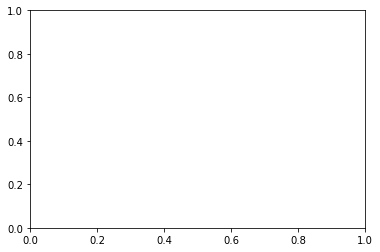

In [80]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy) + 1)

plt.plot(epochs, acc, 'bo', label='Training accracy')
plt.plot(epochs, val_accuracy, 'b-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [60]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range=0.2, #상하로 움직여본다
    shear_range=0.2, #이미지의 기울기 결정
    zoom_range = 0.2, #확대 축소
    horizontal_flip=True, #좌우 반전
    fill_mode = 'nearest'
)

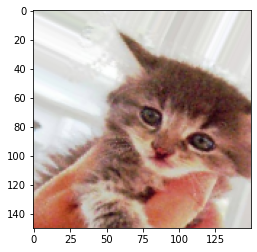

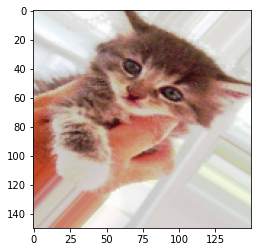

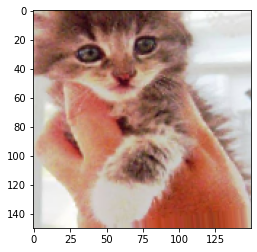

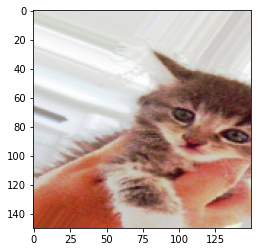

In [78]:
#틀어진 사진
from tensorflow.keras.preprocessing import image
    
fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])
img_path = fnames[4]
img = image.load_img(img_path, target_size = (150,150))
x = image.img_to_array(img)
x = x.reshape((1,)+x.shape)
i=0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
        break
plt.show()

In [82]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)
#증식시키는 코드 [
train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=32,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')
#]
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2007 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
10/10 [==============================] - 12s 1s/step - loss: 0.5713 - accuracy: 0.6906 - val_loss: 0.6111 - val_accuracy: 0.6920
Epoch 2/100
10/10 [==============================] - 12s 1s/step - loss: 0.5595 - accuracy: 0.7267 - val_loss: 0.8841 - val_accuracy: 0.6660
Epoch 3/100
10/10 [==============================] - 12s 1s/step - loss: 0.6872 - accuracy: 0.6000 - val_loss: 0.5882 - val_accuracy: 0.6690
Epoch 4/100
10/10 [==============================] - 12s 1s/step - loss: 0.6369 - accuracy: 0.6844 - val_loss: 0.5354 - val_accuracy: 0.7300
Epoch 5/100
10/10 [==============================] - 12s 1s/step - loss: 0.6156 - accuracy: 0.6844 - val_loss: 0.5476 - val_accuracy: 0.6960
Epoch 6/100
10/10 [==============================] - 12s 1s/step - loss: 0.6530 - accuracy: 0.6781 - val_loss: 0.5349 - val_accuracy: 0.7260
Epoch 7/100
10/10 [==============================] - 12s 1s/step - los